Name

# EDA Activity: Net Pracharat Usage in Province ช.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
!python --version
np.version.version

Python 3.10.12


'1.23.5'

As data contains Thai characters, we need to load Thai fonts for matplotlib.

In [ ]:
import matplotlib as mpl

mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font',family='TH Sarabun Chula')

Let's ingest our data file and take a look.

In [ ]:
df = pd.read_csv('internetpracharat2.csv', index_col='ID')
df.head()

,YEAR,MONTH,CIRCUIT_NO,APP_CODE,REGION,VILLAGE,SUBDISTRICT,DISTRICT,PROVINCE,AP_NAME,IP_ADDRESS,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
ID,,,,,,,,,,,,,,,
1,2564,กรกฎาคม,4485d9000,SR711371,ภ.2,หมู่ 13 บ้านมะเกลือ,บ้านกอก,จัตุรัส,ชัยภูมิ,CPM-SR711371,172.16.140.2,"4,901.45","86,793.12",403,57.0
2,2564,กรกฎาคม,4485d9001,SR711374,ภ.2,หมู่ 17 บ้านโนนทอง,บ้านกอก,จัตุรัส,ชัยภูมิ,CPM-SR711374,172.16.140.10,"1,609.27","18,763.15",364,69.0
3,2564,กรกฎาคม,4486d9000,SR711628,ภ.2,หมู่ 1 เพชร,บ้านเพชร,ภูเขียว,ชัยภูมิ,CPM-SR711628,172.16.140.50,"6,318.99","91,007.66",693,182.0
4,2564,กรกฎาคม,4486d9001,SR711630,ภ.2,หมู่ 8 เพชรใต้,บ้านเพชร,ภูเขียว,ชัยภูมิ,CPM-SR711630,172.16.140.58,"2,753.82","71,735.24",855,260.0
5,2564,กรกฎาคม,4486d9002,SR711631,ภ.2,หมู่ 9 กุดตูม,บ้านเพชร,ภูเขียว,ชัยภูมิ,CPM-SR711631,172.16.140.66,"13,661.13","259,679.82",835,54.0


In [ ]:
df.tail()

,YEAR,MONTH,CIRCUIT_NO,APP_CODE,REGION,VILLAGE,SUBDISTRICT,DISTRICT,PROVINCE,AP_NAME,IP_ADDRESS,UPLOAD,DOWNLOAD,NUM_USERS,NUM_DEVICES
ID,,,,,,,,,,,,,,,
1187,2564,กรกฎาคม,5343d9024,SR712885,ภ.3,หมู่ 10 เมืองหนอง,แม่สาว,แม่อาย,เชียงใหม่,CMI-SR712885,172.18.38.50,"9,793.36","156,548.58",982,87.0
1188,2564,กรกฎาคม,5343d9038,SR768854,ภ.3,หมู่ 15 โป่งไฮ,แม่สาว,แม่อาย,เชียงใหม่,CMI-SR768854,172.18.38.106,"31,328.40","572,314.84","1,542",235.0
1189,2564,กรกฎาคม,5343d9035,SR767884,ภ.3,หมู่ 3 ดอยชัยเหนือ,แม่อาย,แม่อาย,เชียงใหม่,CMI-SR767884,172.18.38.98,"6,617.29","161,646.30",537,63.0
1190,2564,กรกฎาคม,5343d9015,SR705362,ภ.3,หมู่ 9 ปางต้นเดื่อ,แม่อาย,แม่อาย,เชียงใหม่,CMI-SR705362,172.18.37.234,"18,093.46","329,186.49","1,816",129.0
1191,2564,กรกฎาคม,5343d9016,SR705364,ภ.3,หมู่ 13 ดอยแหลม,แม่อาย,แม่อาย,เชียงใหม่,CMI-SR705364,172.18.37.242,"67,993.63","1,045,299.83","4,715",194.0


In [ ]:
df.shape

(1191, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 1 to 1191
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         1191 non-null   int64  
 1   MONTH        1191 non-null   object 
 2   CIRCUIT_NO   1191 non-null   object 
 3   APP_CODE     1191 non-null   object 
 4   REGION       1191 non-null   object 
 5   VILLAGE      1191 non-null   object 
 6   SUBDISTRICT  1191 non-null   object 
 7   DISTRICT     1183 non-null   object 
 8   PROVINCE     1191 non-null   object 
 9   AP_NAME      1191 non-null   object 
 10  IP_ADDRESS   1191 non-null   object 
 11  UPLOAD       1188 non-null   object 
 12  DOWNLOAD     1187 non-null   object 
 13  NUM_USERS    1187 non-null   object 
 14  NUM_DEVICES  1187 non-null   float64
dtypes: float64(1), int64(1), object(13)
memory usage: 148.9+ KB


We need to convert data types of numeric columns first.

In [ ]:
df['UPLOAD']=df['UPLOAD'].str.replace(',','')
df['UPLOAD']=df['UPLOAD'].astype('float')
df['DOWNLOAD']=df['DOWNLOAD'].str.replace(',','')
df['DOWNLOAD']=df['DOWNLOAD'].astype('float')
df['NUM_USERS']=df['NUM_USERS'].str.replace(',','')
df['NUM_USERS']=pd.to_numeric(df['NUM_USERS'], errors='coerce')
df['NUM_DEVICES']=pd.to_numeric(df['NUM_DEVICES'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 1 to 1191
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         1191 non-null   int64  
 1   MONTH        1191 non-null   object 
 2   CIRCUIT_NO   1191 non-null   object 
 3   APP_CODE     1191 non-null   object 
 4   REGION       1191 non-null   object 
 5   VILLAGE      1191 non-null   object 
 6   SUBDISTRICT  1191 non-null   object 
 7   DISTRICT     1183 non-null   object 
 8   PROVINCE     1191 non-null   object 
 9   AP_NAME      1191 non-null   object 
 10  IP_ADDRESS   1191 non-null   object 
 11  UPLOAD       1188 non-null   float64
 12  DOWNLOAD     1187 non-null   float64
 13  NUM_USERS    1187 non-null   float64
 14  NUM_DEVICES  1187 non-null   float64
dtypes: float64(4), int64(1), object(10)
memory usage: 148.9+ KB


Now, numeric columns are numeric.

In [ ]:
#หา column
df.columns

Index(['YEAR', 'MONTH', 'CIRCUIT_NO', 'APP_CODE', 'REGION', 'VILLAGE',
       'SUBDISTRICT', 'DISTRICT', 'PROVINCE', 'AP_NAME', 'IP_ADDRESS',
       'UPLOAD', 'DOWNLOAD', 'NUM_USERS', 'NUM_DEVICES'],
      dtype='object')

หา province = ช

In [ ]:
filtered_data = df[df['PROVINCE'].str.startswith('ช')]

หา usage ของ upload, download ของแต่ละจังหวัดที่ขึ้นต้นด้วย ช

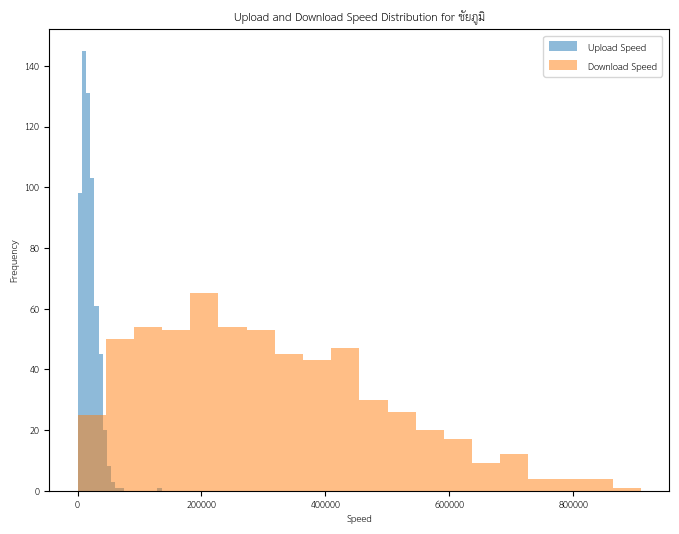

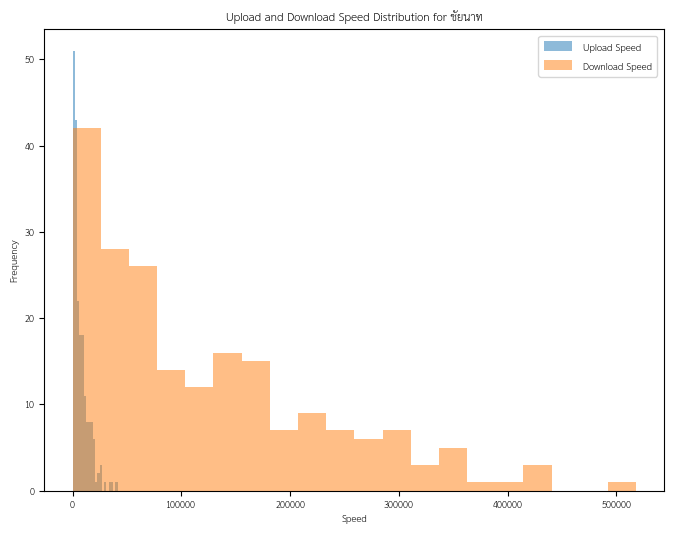

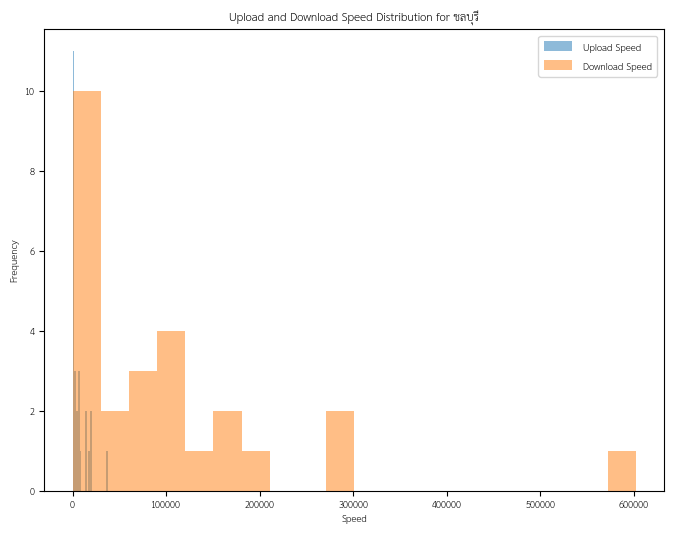

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



grouped_data = filtered_data.groupby('PROVINCE')
means_by_province = grouped_data[['UPLOAD', 'DOWNLOAD', 'NUM_USERS']].mean()
sorted_means = means_by_province.sort_values(by='UPLOAD', ascending=False)

for province, row in sorted_means.iterrows():
    plt.figure(figsize=(8, 6))

    plt.hist(filtered_data[filtered_data['PROVINCE'] == province]['UPLOAD'], bins=20, alpha=0.5, label='Upload Speed')
    plt.hist(filtered_data[filtered_data['PROVINCE'] == province]['DOWNLOAD'], bins=20, alpha=0.5, label='Download Speed')

    plt.xlabel('Speed')
    plt.ylabel('Frequency')
    plt.title(f'Upload and Download Speed Distribution for {province}')
    plt.legend()

    plt.show()

เอาค่าเฉลี่ย user แต่ละจังหวัด กับ usage มาหา

In [ ]:
import pandas as pd


filtered_data = df[df['PROVINCE'].str.startswith('ช')]


upload_speed_mean = filtered_data['UPLOAD'].mean()
download_speed_mean = filtered_data['DOWNLOAD'].mean()
user_usage_mean = filtered_data['NUM_USERS'].mean()


print(f"Mean Upload Speed: {upload_speed_mean:.2f} Mbps")
print(f"Mean Download Speed: {download_speed_mean:.2f} Mbps")
print(f"Mean User Usage: {user_usage_mean:.2f}")

Mean Upload Speed: 15799.28 Mbps
Mean Download Speed: 254608.15 Mbps
Mean User Usage: 1084.91


ค่าเฉลี่ยแต่ละจังหวัด เห็นได้ว่า ชัยภูมิเยอะสุด

In [ ]:
filtered_data = df[df['PROVINCE'].str.startswith('ช')]
grouped_data = filtered_data.groupby('PROVINCE')
means_by_province = grouped_data[['UPLOAD', 'DOWNLOAD', 'NUM_USERS']].mean()
sorted_means = means_by_province.sort_values(by='UPLOAD', ascending=False)
sorted_means.head()


,UPLOAD,DOWNLOAD,NUM_USERS
PROVINCE,,,
ชัยภูมิ,18961.839352,304997.555633,1272.756494
ชัยนาท,7357.496911,121141.929138,598.945813
ชลบุรี,6660.006923,102830.046385,428.807692


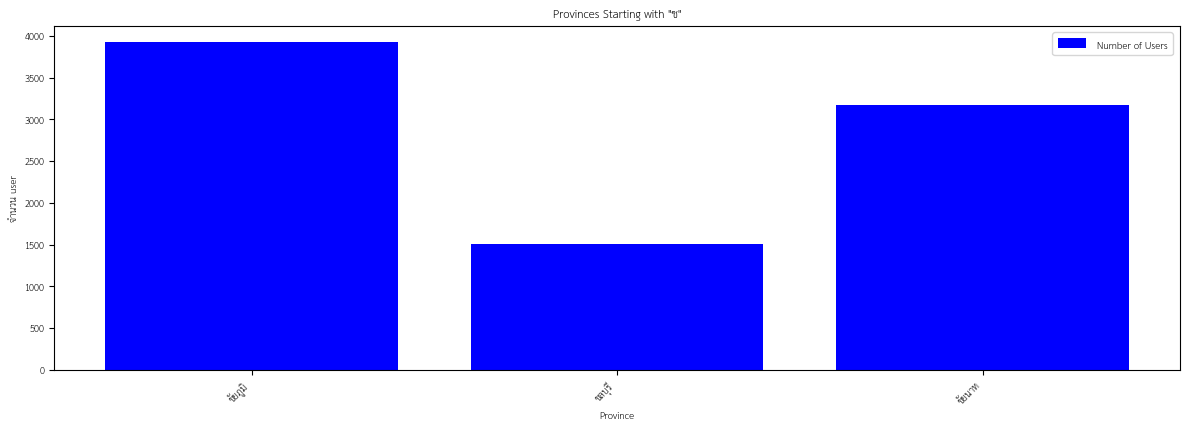

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 2)
plt.bar(filtered_data['PROVINCE'], filtered_data['NUM_USERS'], color='blue', label='Number of Users')
plt.xlabel('Province')
plt.ylabel('จำนวน user')
plt.title('Provinces Starting with "ช"')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

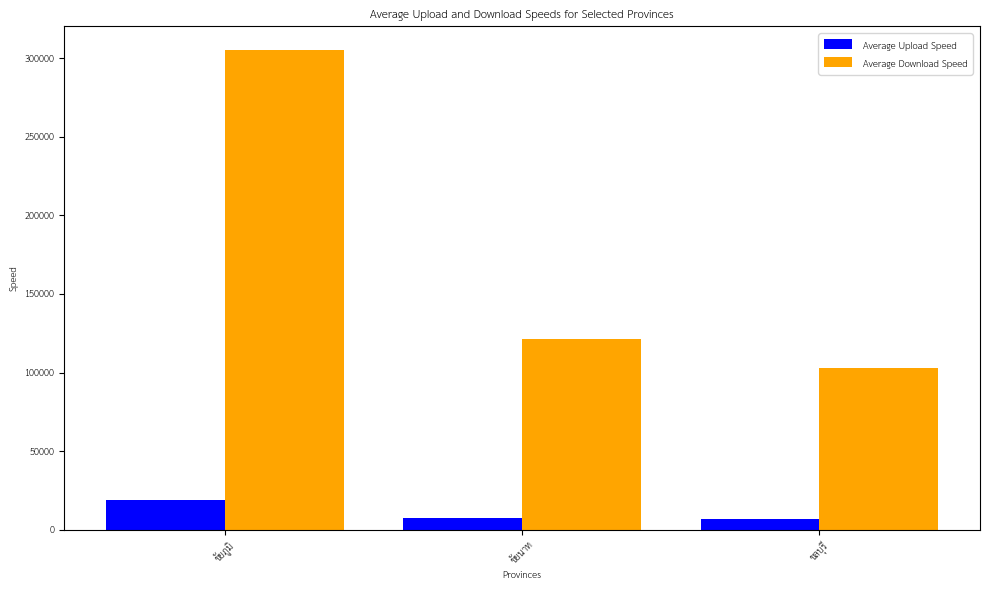

In [ ]:
import matplotlib.pyplot as plt

# Data
provinces = sorted_means.index
upload_speeds = sorted_means['UPLOAD']
download_speeds = sorted_means['DOWNLOAD']

# Set up positions for bars
bar_width = 0.4
index = range(len(provinces))

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(index, upload_speeds, width=bar_width, label='Average Upload Speed', color='blue')
plt.bar([i + bar_width for i in index], download_speeds, width=bar_width, label='Average Download Speed', color='orange')
plt.xlabel('Provinces')
plt.ylabel('Speed')
plt.title('Average Upload and Download Speeds for Selected Provinces')
plt.xticks([i + bar_width/2 for i in index], provinces, rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


หาค่า mean median mode ของแต่ละจังหวัด

In [ ]:
import pandas as pd
from scipy import stats


filtered_df = df[df['PROVINCE'].str.startswith("ช")]

grouped_data = filtered_df.groupby('PROVINCE')[['UPLOAD', 'DOWNLOAD', 'NUM_USERS']].agg(
    mean_upload=('UPLOAD', 'mean'),
    median_upload=('UPLOAD', 'median'),
    mode_upload=('UPLOAD', lambda x: stats.mode(x, keepdims=True)[0][0]),
    mean_download=('DOWNLOAD', 'mean'),
    median_download=('DOWNLOAD', 'median'),
    mode_download=('DOWNLOAD', lambda x: stats.mode(x, keepdims=True)[0][0]),
    mean_num_users=('NUM_USERS', 'mean'),
    median_num_users=('NUM_USERS', 'median'),
    mode_num_users=('NUM_USERS', lambda x: stats.mode(x, keepdims=True)[0][0])
)

sorted_data = grouped_data.sort_values(by='mean_upload', ascending=False)

for province in sorted_data.index[:3]:
    print("Province:", province)
    print("Upload:")
    print("Mean:", sorted_data.loc[province, 'mean_upload'])
    print("Median:", sorted_data.loc[province, 'median_upload'])
    print("Mode:", sorted_data.loc[province, 'mode_upload'])
    print()
    print("Download:")
    print("Mean:", sorted_data.loc[province, 'mean_download'])
    print("Median:", sorted_data.loc[province, 'median_download'])
    print("Mode:", sorted_data.loc[province, 'mode_download'])
    print()
    print("Number of Users:")
    print("Mean:", sorted_data.loc[province, 'mean_num_users'])
    print("Median:", sorted_data.loc[province, 'median_num_users'])
    print("Mode:", sorted_data.loc[province, 'mode_num_users'])
    print()
    print("=" * 30)


Province: ชัยภูมิ
Upload:
Mean: 18961.839351701783
Median: 16682.73
Mode: 0.0

Download:
Mean: 304997.5556331169
Median: 279745.43
Mode: nan

Number of Users:
Mean: 1272.7564935064936
Median: 1176.5
Mode: 758.0

Province: ชัยนาท
Upload:
Mean: 7357.4969113300485
Median: 4963.44
Mode: 0.0

Download:
Mean: 121141.92913793103
Median: 88496.31
Mode: 0.0

Number of Users:
Mean: 598.9458128078818
Median: 509.0
Mode: 337.0

Province: ชลบุรี
Upload:
Mean: 6660.006923076923
Median: 3444.36
Mode: 40.924

Download:
Mean: 102830.04638461539
Median: 74266.62
Mode: 39.17

Number of Users:
Mean: 428.8076923076923
Median: 332.5
Mode: 361.0



In [ ]:
upload_speeds = filtered_df.groupby('PROVINCE')['UPLOAD'].mean()

std_deviation = upload_speeds.std()
variance = upload_speeds.var()
data_range = upload_speeds.max() - upload_speeds.min()

print("Standard Deviation:", std_deviation)
print("Variance:", variance)
print("Range:", data_range)


Standard Deviation: 6909.924467255922
Variance: 47747056.14318203
Range: 12301.83242862486


In [ ]:
#หา outliers?
#Are there relationships amongst features?


Outliers in UPLOAD:
     YEAR    MONTH CIRCUIT_NO  APP_CODE REGION             VILLAGE  \
ID                                                                   
22   2564  กรกฎาคม  3823d9000  SR768517    ภ.5  หมู่ 1 ทุ่งคาเหนือ   
194  2564  กรกฎาคม  3831d9004  SR669379    ภ.5       หมู่ 8 หินกอง   

    SUBDISTRICT  DISTRICT PROVINCE       AP_NAME     IP_ADDRESS   UPLOAD  \
ID                                                                         
22     ห้วยใหญ่  บางละมุง   ชลบุรี  PTY-SR768517   172.19.44.74  100.569   
194     หนองขาม   ศรีราชา   ชลบุรี  PTY-SR669379  172.19.44.154  109.281   

     DOWNLOAD NUM_USERS  NUM_DEVICES  
ID                                    
22     39.170        57          8.0  
194   585.312        17         12.0  

Outliers in DOWNLOAD:
     YEAR    MONTH CIRCUIT_NO  APP_CODE REGION           VILLAGE SUBDISTRICT  \
ID                                                                             
194  2564  กรกฎาคม  3831d9004  SR669379    ภ.5     หมู่

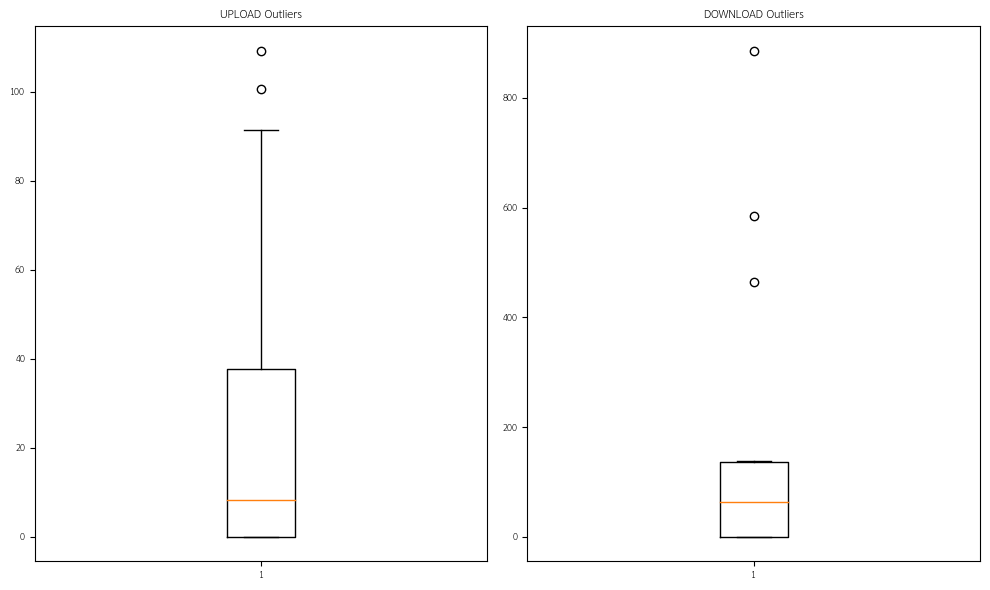

In [ ]:
# outliner


# Load your DataFrame
df = pd.read_csv('internetpracharat2.csv', index_col='ID')

# Convert columns to numeric type (if needed)
df['UPLOAD'] = pd.to_numeric(df['UPLOAD'], errors='coerce')
df['DOWNLOAD'] = pd.to_numeric(df['DOWNLOAD'], errors='coerce')

# Drop rows with missing values in UPLOAD or DOWNLOAD columns
df_cleaned = df.dropna(subset=['UPLOAD', 'DOWNLOAD'])

# Calculate IQR and bounds for UPLOAD
Q1_upload = df_cleaned['UPLOAD'].quantile(0.25)
Q3_upload = df_cleaned['UPLOAD'].quantile(0.75)
IQR_upload = Q3_upload - Q1_upload
lower_bound_upload = Q1_upload - 1.5 * IQR_upload
upper_bound_upload = Q3_upload + 1.5 * IQR_upload

# Identify outliers in UPLOAD
outliers_upload = df_cleaned[(df_cleaned['UPLOAD'] < lower_bound_upload) | (df_cleaned['UPLOAD'] > upper_bound_upload)]

# Calculate IQR and bounds for DOWNLOAD
Q1_download = df_cleaned['DOWNLOAD'].quantile(0.25)
Q3_download = df_cleaned['DOWNLOAD'].quantile(0.75)
IQR_download = Q3_download - Q1_download
lower_bound_download = Q1_download - 1.5 * IQR_download
upper_bound_download = Q3_download + 1.5 * IQR_download

# Identify outliers in DOWNLOAD
outliers_download = df_cleaned[(df_cleaned['DOWNLOAD'] < lower_bound_download) | (df_cleaned['DOWNLOAD'] > upper_bound_download)]


print("Outliers in UPLOAD:")
print(outliers_upload)

print("\nOutliers in DOWNLOAD:")
print(outliers_download)
# Create plots
plt.figure(figsize=(10, 6))

# Plot UPLOAD outliers
plt.subplot(1, 2, 1)
plt.boxplot(df_cleaned['UPLOAD'])
plt.title('UPLOAD Outliers')

# Plot DOWNLOAD outliers
plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['DOWNLOAD'])
plt.title('DOWNLOAD Outliers')

plt.tight_layout()
plt.show()

In [ ]:

# Load your DataFrame
df = pd.read_csv('internetpracharat2.csv', index_col='ID')

# Convert columns to numeric type and handle missing values
numeric_columns = ['UPLOAD', 'DOWNLOAD']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df_cleaned = df.dropna(subset=numeric_columns)

# Calculate IQR and bounds for UPLOAD
Q1_upload = df_cleaned['UPLOAD'].quantile(0.25)
Q3_upload = df_cleaned['UPLOAD'].quantile(0.75)
IQR_upload = Q3_upload - Q1_upload
lower_bound_upload = Q1_upload - 1.5 * IQR_upload
upper_bound_upload = Q3_upload + 1.5 * IQR_upload

# Identify outliers in UPLOAD
outliers_upload = df_cleaned[(df_cleaned['UPLOAD'] < lower_bound_upload) | (df_cleaned['UPLOAD'] > upper_bound_upload)]

# Calculate IQR and bounds for DOWNLOAD
Q1_download = df_cleaned['DOWNLOAD'].quantile(0.25)
Q3_download = df_cleaned['DOWNLOAD'].quantile(0.75)
IQR_download = Q3_download - Q1_download
lower_bound_download = Q1_download - 1.5 * IQR_download
upper_bound_download = Q3_download + 1.5 * IQR_download

# Identify outliers in DOWNLOAD
outliers_download = df_cleaned[(df_cleaned['DOWNLOAD'] < lower_bound_download) | (df_cleaned['DOWNLOAD'] > upper_bound_download)]

# Display outliers
print("Outliers in UPLOAD:")
print(outliers_upload)

print("\nOutliers in DOWNLOAD:")
print(outliers_download)


Outliers in UPLOAD:
     YEAR    MONTH CIRCUIT_NO  APP_CODE REGION             VILLAGE  \
ID                                                                   
22   2564  กรกฎาคม  3823d9000  SR768517    ภ.5  หมู่ 1 ทุ่งคาเหนือ   
194  2564  กรกฎาคม  3831d9004  SR669379    ภ.5       หมู่ 8 หินกอง   

    SUBDISTRICT  DISTRICT PROVINCE       AP_NAME     IP_ADDRESS   UPLOAD  \
ID                                                                         
22     ห้วยใหญ่  บางละมุง   ชลบุรี  PTY-SR768517   172.19.44.74  100.569   
194     หนองขาม   ศรีราชา   ชลบุรี  PTY-SR669379  172.19.44.154  109.281   

     DOWNLOAD NUM_USERS  NUM_DEVICES  
ID                                    
22     39.170        57          8.0  
194   585.312        17         12.0  

Outliers in DOWNLOAD:
     YEAR    MONTH CIRCUIT_NO  APP_CODE REGION           VILLAGE SUBDISTRICT  \
ID                                                                             
194  2564  กรกฎาคม  3831d9004  SR669379    ภ.5     หมู่

<ipython-input-21-be9255b38546>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = filtered_data.groupby('PROVINCE')[['UPLOAD', 'DOWNLOAD', 'NUM_USERS']].mean()


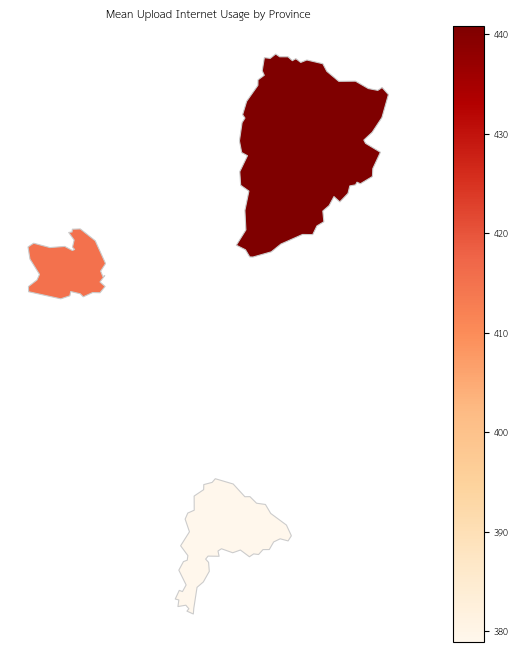

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the GeoJSON file with province geometries and names
thailand_with_names = gpd.read_file("thailandWithName.json")

# Mapping of province names from DataFrame to GeoJSON names
province_mapping = {
    "ชลบุรี": "Chon Buri",
    "ชัยภูมิ": "Chaiyaphum",
    "ชัยนาท": "Chai Nat"
}

# Filter data for specific provinces
filtered_data = df[df['PROVINCE'].isin(province_mapping.keys())]

# Group data by province and calculate means
grouped_data = filtered_data.groupby('PROVINCE')[['UPLOAD', 'DOWNLOAD', 'NUM_USERS']].mean()

# Reset index to move 'PROVINCE' from index to a regular column
grouped_data = grouped_data.reset_index()

# Map province names from DataFrame to GeoJSON names
grouped_data['PROVINCE'] = grouped_data['PROVINCE'].map(province_mapping)

# Merge the GeoDataFrame with province geometries and the grouped data
merged_data = thailand_with_names.merge(grouped_data, left_on='name', right_on='PROVINCE')

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the map with color-coded data
merged_data.plot(column='UPLOAD', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title
ax.set_title('Mean Upload Internet Usage by Province')

# Remove axis
ax.set_axis_off()

# Show the map
plt.show()


<ipython-input-22-4098dfa78c60>:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_by_province = grouped_data[['UPLOAD', 'DOWNLOAD', 'NUM_USERS']].mean()
<ipython-input-22-4098dfa78c60>:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(cmap)


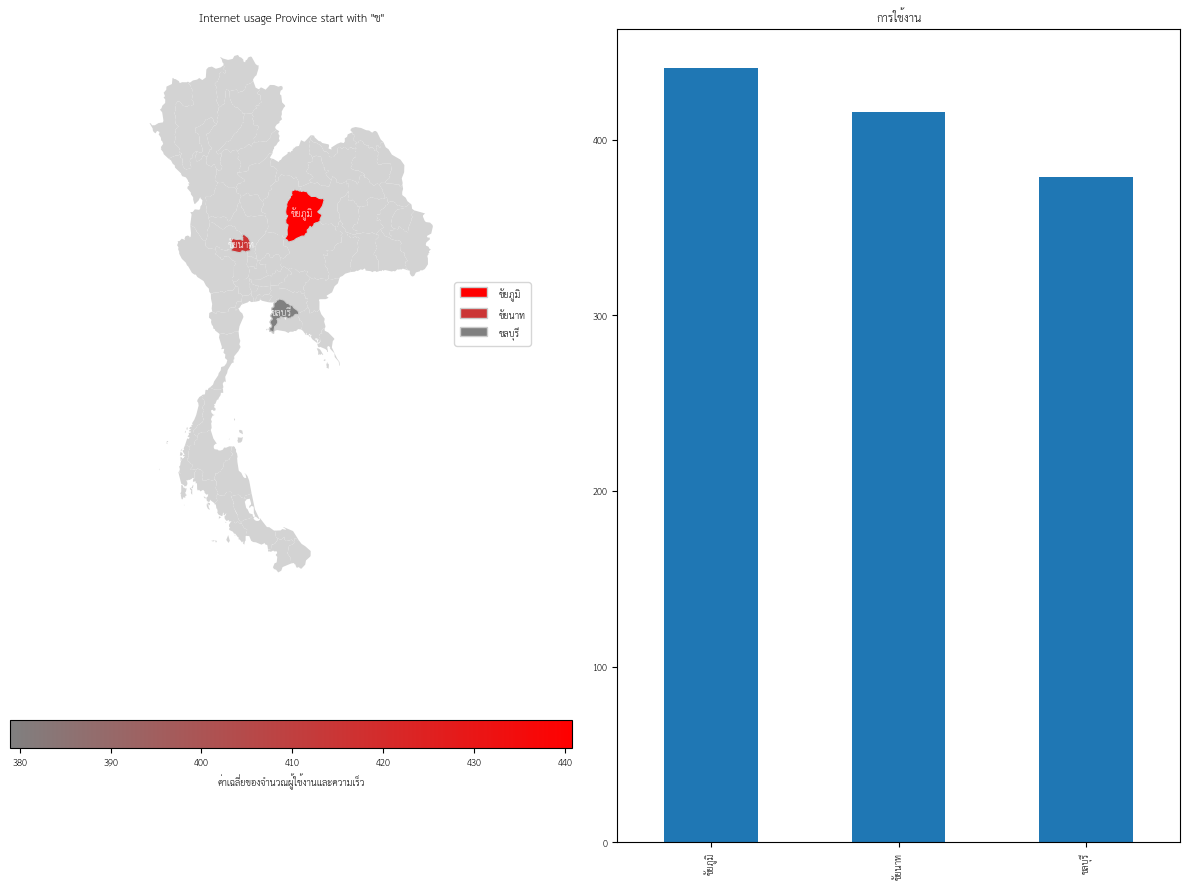

In [ ]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.patches import Patch

# Load the GeoJSON file with province geometries and names
thailand_with_names = gpd.read_file("thailandWithName.json")

# Mapping of province names from DataFrame to GeoJSON names
province_mapping = {
    "ชลบุรี": "Chon Buri",
    "ชัยภูมิ": "Chaiyaphum",
    "ชัยนาท": "Chai Nat"
}

# Filter data for specific provinces
filtered_data = df[df['PROVINCE'].str.startswith('ช')]
grouped_data = filtered_data.groupby('PROVINCE')
means_by_province = grouped_data[['UPLOAD', 'DOWNLOAD', 'NUM_USERS']].mean()
sorted_means = means_by_province.sort_values(by='UPLOAD', ascending=False)

# Normalize data for color mapping
norm = Normalize(vmin=sorted_means['UPLOAD'].min(), vmax=sorted_means['UPLOAD'].max())

# Create a custom colormap from red to green using Gaussian distribution

cmap = LinearSegmentedColormap.from_list("custom_colormap", [
     (0.5, 0.5, 0.5),
     #(0.0, 1.0, 0.0),
     (1.0, 0.0, 0.0),  # Red

], N=256)
cmap = plt.cm.get_cmap(cmap)

# Reproject geometries to an appropriate projected CRS
thailand_with_names = thailand_with_names.to_crs(epsg=3395)

# Create a figure and axis
fig, ax = plt.subplots(1, 2, figsize=(12, 9))

# Plot the map with color-coded data
thailand_with_names.plot(ax=ax[0], color='lightgray')
legend_elements = []
for idx, row in sorted_means.iterrows():
    province_name = province_mapping.get(idx)
    province_geom = thailand_with_names[thailand_with_names['name'] == province_name]
    color = cmap(norm(row['UPLOAD']))
    province_geom.plot(ax=ax[0], color=color, linewidth=0.8, edgecolor='0.8', legend=True)

    # Annotate the province with its name (white text)
    centroid = province_geom.geometry.centroid
    ax[0].annotate(text=idx, xy=(centroid.x, centroid.y), color='white', fontsize=10,
                   ha='center', va='center', weight='bold')  # Adjust font weight if needed

    # Create legend elements
    legend_elements.append(Patch(facecolor=color, edgecolor='0.8', label=idx))

# Create colorbar and position it
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax[0], orientation="horizontal")
cbar.set_label("ค่าเฉลี่ยของจำนวณผู้ใช้งานและความเร็ว")

# Set plot title
ax[0].set_title('Internet usage Province start with "ช"')

# Remove axis
ax[0].set_axis_off()

# Create a legend on the right side
legend = ax[0].legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

# Plot the bar graph for mean values
sorted_means.plot(kind='bar', y='UPLOAD', ax=ax[1], legend=None)
ax[1].set_xlabel('')
ax[1].set_title('การใช้งาน')

# Show the plots
plt.tight_layout()
plt.show()


Text(0.5, 0, 'จำนวนอุปกรณ์')

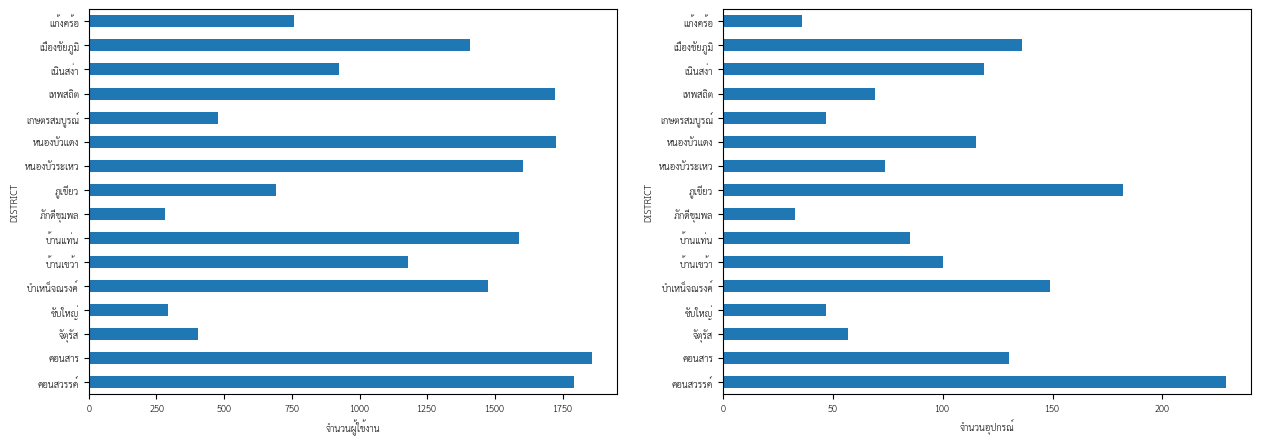

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
df[df['PROVINCE'] == 'ชัยภูมิ'].groupby('DISTRICT').first()['NUM_USERS'].plot.barh(ax=ax[0]).set_xlabel('จำนวนผู้ใช้งาน')
df[df['PROVINCE'] == 'ชัยภูมิ'].groupby('DISTRICT').first()['NUM_DEVICES'].plot.barh(ax=ax[1]).set_xlabel('จำนวนอุปกรณ์')